In [1]:
###### This program will plot the DOS & PDOS of the data derived from DFT #####
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, FixedLocator

In [2]:
### To import the CSV file for bands
dos= pd.read_csv('bto_dft.csv') ## Name of the CSV File
#print(bands)

In [3]:
DOS=dos.iloc[:,6:] # to select the columns from 6 to 17 
# DOS

In [4]:
### To find Fermi Level
Ef=dos.Fermi[0]
# print(Ef,'eV')
New_E=dos.Edos-Ef

/tmp/ipykernel_6652/3739074533.py:133: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  neww.append(float(new['Edos']))


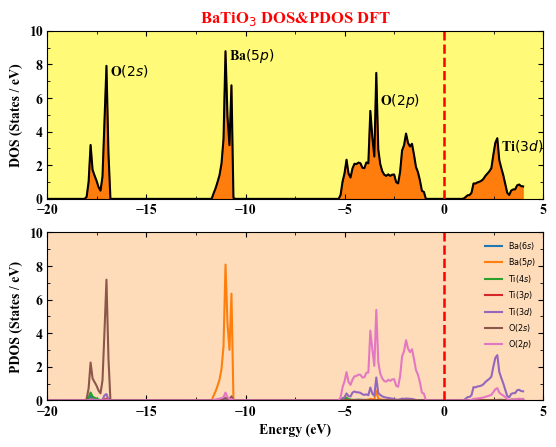

In [21]:
####################################################################################################################
#                                              DOS                                                                 #
####################################################################################################################
#
# plt.figure(figsize=(10,10))
# plt.figure(1)
ax=plt.subplot(2, 1, 1)
plt.plot(New_E,dos.DOS,color='#000000')

####################################################################################################################
#                                      DOS Fill and Background color                                               #
####################################################################################################################

plt.fill_between(New_E,dos.DOS, alpha=0.9,color='#ff6f00')
ax.set_facecolor('#fffa78') #Set Background color

####################################################################################################################
#                                       Ticks,limit,label,title                                                    #
####################################################################################################################
### DOS Limits
ymax=dos.DOS.max()
plt.xlim(-20,5)  ### DOS X limit
plt.ylim(0,round(ymax+1))   ### DOS Y limit

### print(ticks)
plt.xticks(fontname='Times New Roman',fontsize=10,fontweight='bold')
plt.yticks(fontname = "Times New Roman",fontsize=10, fontweight='bold')

### Minor ticks on
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


### To set the Ticks inward
plt.tick_params(axis='both',direction='in',which='both',grid_linewidth=1.0)
plt.tick_params(bottom=True, top=True, left=True, right=True, which='both')

### Draw line at Fermi level
plt.axvline(0, color='r', linestyle='--',linewidth=1.8)

### Axis Labels
# plt.xlabel('Energy (eV)', fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.ylabel('DOS (States / eV)',fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})

### To give Title
T1=dos.Title[1]
# print(T1)
T2=T1.split('-')
# print(T2)
Dos_Title=' '.join(T2)
# print(Dos_Title)
plt.title(Dos_Title,fontdict={'fontname':'Times New Roman','fontsize':12,'fontweight':'bold','color':'r'})



####################################################################################################################
#                                              PDOS                                                                 #
####################################################################################################################
legend=[]
ax=plt.subplot(2, 1, 2)
for n,atoms in enumerate(DOS, start=1):
    if (atoms!='Edos') & (atoms !='DOS') & (atoms[0:].endswith('$')):
        legend.append(str(atoms[0:]))
#         print(DOS[atoms])
        plt.plot(New_E, DOS[atoms])
#         plt.fill_between(New_E,DOS[atoms], alpha=0.9,color='#ff6f00')
        ymax=dos.DOS.max()
        plt.xlim(-20,5)             ### PDOS X limit
        plt.ylim(0,round(ymax+1))   ### PDOS y limit


####################################################################################################################
#                                     PDOS Fill and Background color                                               #
####################################################################################################################

### Background color
ax.set_facecolor('#fedcba') #Set Background color

####################################################################################################################
#                                       Ticks,limit,label,title                                                    #
####################################################################################################################

### print(ticks)
plt.xticks(fontname='Times New Roman',fontsize=10,fontweight='bold')
plt.yticks(fontname = "Times New Roman",fontsize=10, fontweight='bold')


### Minor ticks on
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))


### To set the Ticks inward
plt.tick_params(axis='both',direction='in',which='both',grid_linewidth=1.0)
plt.tick_params(bottom=True, top=True, left=True, right=True, which='both')

### Draw line at Fermi level
plt.axvline(0, color='r', linestyle='--',linewidth=1.8)

### Axis Labels
plt.xlabel('Energy (eV)', fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})
plt.ylabel('PDOS (States / eV)',fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold'})


### Legend
plt.legend(legend,loc=0,fontsize='xx-small',framealpha =0) ### legend for PDOS


####################################################################################################################
#                                      Annotation  data taking from PDOS data                                      #
####################################################################################################################

### to find the energy values of each orbital electrons contribution
max_int=[]
atom=[]
for n,atoms in enumerate(DOS, start=1):
    if (atoms!='Edos') & (atoms !='DOS') & (atoms[0:].endswith('$')):
        atom.append(atoms)
        max_int.append((DOS[atoms].max()))
#         print((DOS[atoms].max()))
# print(max_int)
# print(atom)

atom_max={}
for i in range(len(atom)):
    atom_max[atom[i]] = max_int[i]
# print('atoms with their max int =',atom_max)

neww=[]
for atm, m_int in atom_max.items():
#     print(atm, ":", m_int)
    new=DOS.loc[DOS[atm] == m_int]
    neww.append(float(new['Edos']))

    
x1=neww-Ef
x = x1.tolist() ## ENERGY (eV)
y=max_int       ##(Intensity)
# print('x value=',x)
# print(len(x))
# print('y value=',y)
# print(atom)

####################################################################################################################
#                                           Annotations for DOS                                                    #
####################################################################################################################

ax=plt.subplot(2, 1, 1)
def plttext(x,y,atom):
    plt.text(x,y,atom,fontdict={'fontname':'Times New Roman','fontsize':10,'fontweight':'bold','color':'#000000'})


for N in range(len(x)): 
    if ((x[N]>-20) & (x[N]<6) & (y[N]>1)): ### to remove the annotations beyond the plot axis limit
        plttext(x[N]+0.2,y[N]+0.2,atom[N]) ### to adjust the position of the text annotation over the DOS 

####################################################################################################################
#                                              Save Figure                                                                 #
####################################################################################################################
### Save PLot
plt.savefig(Dos_Title+'.png',dpi=1200)


#### to show figure
plt.show()

